### 问题三：

建立辛烷值（RON）损失预测模型：采用上述样本和建模主要变量，通过数据挖掘技术建立辛烷值（RON）损失预测模型，并进行模型验证。

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge  # 线性回归
from sklearn.model_selection import train_test_split  # 这里是引用了交叉验证

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r samples_data
# cluster 1st
%store -r model_features_1st
%store -r produc_features_1st
%store -r weight_1st
# cluster 2nd
%store -r model_features_2nd
%store -r produc_features_2nd
%store -r weight_2nd

In [3]:
if ('时间', 'Unnamed: 1_level_1') in model_features_1st.keys():
    del model_features_1st[('时间', 'Unnamed: 1_level_1')]
model_features_1st.head(n=5)

,S-ZORB.FC_1201.PV,S-ZORB.FC_5103.DACA,S-ZORB.FC_2702.DACA,S-ZORB.TE_1107.DACA,S-ZORB.BS_AT_2402.PV,S-ZORB.LT_2901.DACA,S-ZORB.LC_5102.DACA,S-ZORB.FT_1301.DACA,S-ZORB.LC_1201.PV,S-ZORB.AC_6001.PV,...,S-ZORB.SIS_PT_2602.PV,S-ZORB.TE_5202.PV,S-ZORB.PDT_3502.DACA,S-ZORB.TE_1501.DACA,S-ZORB.TE_1001.PV,S-ZORB.HIC_2533.AUTOMANA.OP,S-ZORB.FT_1001.PV,S-ZORB.PDT_3002.DACA,S-ZORB.LT_3801.DACA,原料性质
,D104去稳定塔流量,稳定塔顶回流流量,D-110底流化N2流量,E-101D壳程出口管温度,闭锁料斗氧含量,D-109吸附剂料位,D-201水包界位,K-103出口去K-101出口管流量,D104液面,加热炉氧含量,...,再生器顶部/再生器接收器差压,精制汽油出装置温度,ME-109过滤器差压,D-122入口管温度,原料进装置温度,HV2533手操器,催化汽油进装置总流量,ME-105过滤器压差,D-125液位,辛烷值RON
324,116.260115,10935.59125,31.435405,124.205312,0.066352,37.612641,49.308646,2659.89535,50.034019,2.202533,...,111.688880,37.795462,10.687697,21.632472,69.928027,100.0,117.720835,4.361624,-0.385746,0.196377
323,115.351760,11831.05375,31.629264,123.123952,0.062292,44.545153,45.484899,3008.69925,50.013484,2.191190,...,111.943320,35.154480,10.585208,21.812414,70.397828,100.0,125.895110,4.313126,-0.094022,-0.370934
322,115.647893,11475.92050,31.730374,122.736107,0.057254,55.308304,40.356015,3324.24260,50.051713,2.196760,...,112.342320,36.037239,11.383706,21.802443,69.643416,100.0,123.501397,4.388240,-0.014480,-0.370934
321,115.434765,13514.39125,29.777903,123.030560,0.060190,66.512932,49.152954,2911.15755,50.011796,2.182150,...,111.480477,34.735130,10.937725,21.932511,70.428077,100.0,127.956985,0.646210,0.077742,-0.597858
320,114.662462,11675.13325,28.955438,124.334542,0.052389,7.021087,69.701451,2933.87270,50.039356,2.196662,...,112.140840,34.331862,10.128979,22.422047,72.644269,100.0,124.803388,4.531366,0.025413,-0.597858


In [4]:
if ('时间', 'Unnamed: 1_level_1') in model_features_2nd.keys():
    del model_features_2nd[('时间', 'Unnamed: 1_level_1')]
model_features_2nd.head(n=5)

,S-ZORB.TE_5202.PV,S-ZORB.FT_9102.PV,S-ZORB.LT_9001.DACA,S-ZORB.TC_2201.OP,S-ZORB.LC_1201.PV,S-ZORB.PT_6002.PV,S-ZORB.PDT_2606.DACA,S-ZORB.FT_3501.DACA,S-ZORB.AT-0011.DACA.PV,S-ZORB.TE_7504.DACA,...,S-ZORB.TE_9002.DACA,S-ZORB.LI_9102.DACA,S-ZORB.PDC_2607.PV,S-ZORB.AT-0008.DACA.PV,S-ZORB.TXE_2203A.DACA,S-ZORB.AI_2903.PV,S-ZORB.TE_2608.DACA,S-ZORB.CAL_H2.PV,S-ZORB.FT_9201.PV,原料性质
,精制汽油出装置温度,火炬气排放流量,D-203底部液位,EH101出口,D104液面,加热炉炉膛压力,R-102底滑阀差压,循环氢至闭锁料斗料腿流量,S_ZORB AT-0011,K-102A排气温度,...,D-203顶部出口管温度,D-204液位,R102转剂线压差,S_ZORB AT-0008,EH-101加热元件温度,再生烟气氧含量,R-102底部锥段温度,氢油比,循环水进装置流量,辛烷值RON
302,37.805150,1.173297e+07,-1.365035,10.0,49.996073,-0.171115,3.390523,-0.018787,0.670982,19.24878,...,40.187005,60.430943,27.202543,0.693989,377.658987,5090.635100,441.632868,0.249154,490.472150,0.650225
291,34.682821,8.490662e+06,-1.357267,10.0,50.038723,-0.254149,12.055007,-0.019109,0.680290,19.24878,...,35.814276,54.121831,21.407790,0.700673,368.811958,0.035802,477.157017,0.287452,493.352560,-1.278630
290,36.886109,8.082110e+06,-1.366509,10.0,49.984607,-0.262551,12.737633,-0.018902,0.672048,19.24878,...,40.150302,43.995125,19.023768,0.690734,380.936382,0.315823,474.041060,0.281411,498.007182,-0.711320
289,37.129522,7.809743e+06,-1.368641,10.0,50.031432,-0.284343,12.114046,-0.020096,0.663611,19.24878,...,39.572968,60.397504,18.130908,0.698439,375.278435,0.262105,467.114460,0.271662,499.805440,-0.824782
284,36.803966,6.175536e+06,-1.401113,10.0,49.601571,-0.267372,8.104848,-0.014209,0.655061,19.24878,...,42.269520,61.336831,10.925054,0.709054,373.242802,0.379689,404.505900,0.273399,457.970913,-0.484396


## 对于 类别-1 进行线性回归建模

In [5]:
# 构建训练集和测试集 cluster 1st
X = model_features_1st
y = produc_features_1st[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(133, 32)
y_train.shape=(133, 1)
X_test.shape=(45, 32)
y_test.shape=(45, 1)


In [6]:
# 多项式线性回归
# Applying LinearRegression
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)

X_quadratic = quadratic_featurizer.transform(X)
X_test_quadratic = quadratic_featurizer.transform(X_test)

model_1st = Ridge(alpha=1.0)
model_1st.fit(X_train_quadratic, y_train)
y_train_pred = model_1st.predict(X_train_quadratic)
y_test_pred = model_1st.predict(X_test_quadratic)
y_pred = model_1st.predict(X_quadratic)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.003, test:170.692, whole:43.155
R^2 train:0.987, test:-711.959, whole:-177.964


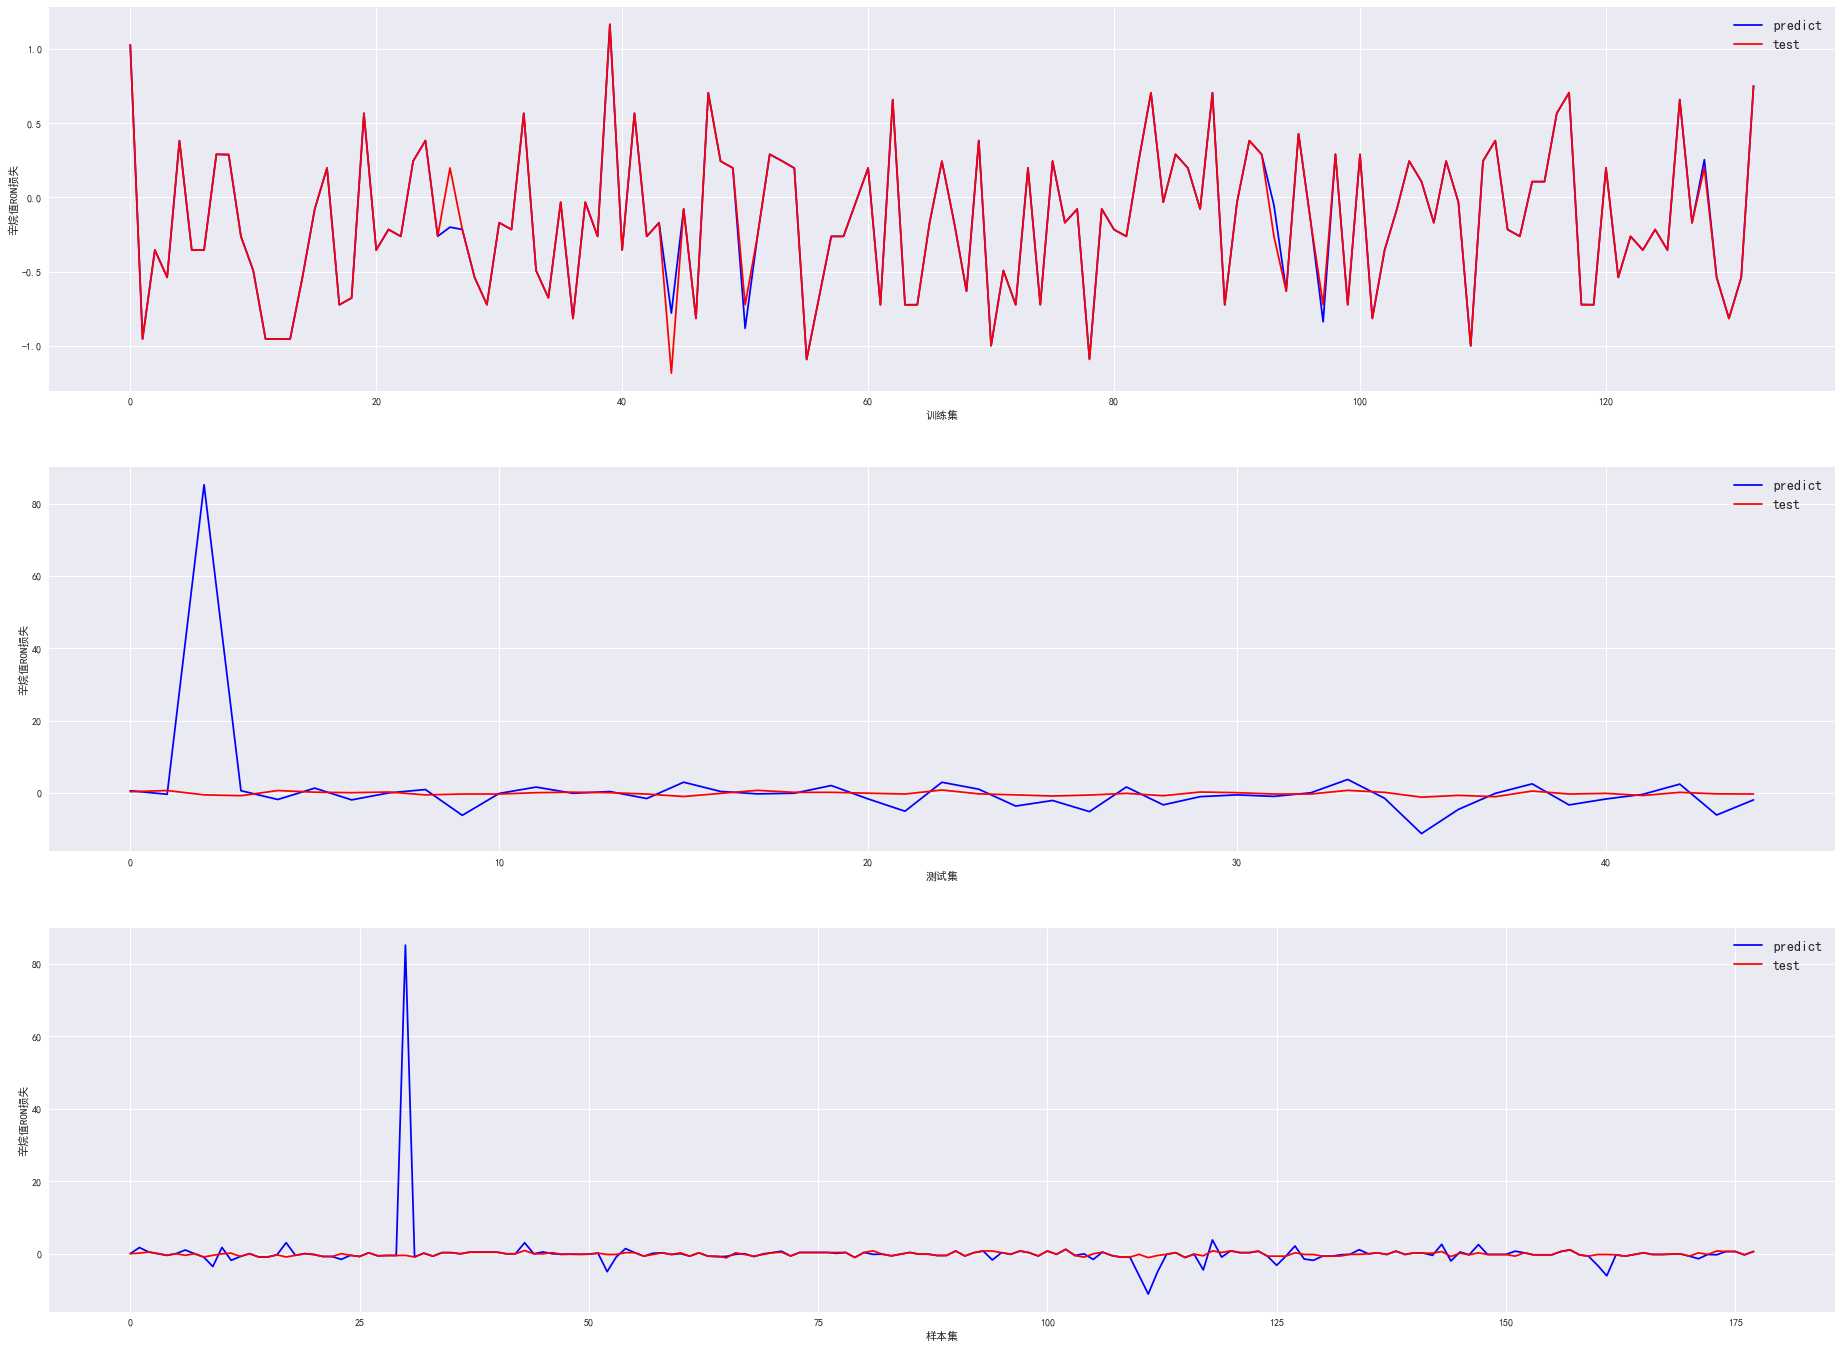

In [7]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 对于 类别-2 进行线性回归建模

In [8]:
# 构建训练集和测试集 cluster 2nd
X = model_features_2nd
y = produc_features_2nd[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(81, 32)
y_train.shape=(81, 1)
X_test.shape=(27, 32)
y_test.shape=(27, 1)


In [9]:
# 多项式线性回归
# Applying LinearRegression
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)

X_quadratic = quadratic_featurizer.transform(X)
X_test_quadratic = quadratic_featurizer.transform(X_test)

model_2nd = Ridge(alpha=1.0)
model_2nd.fit(X_train_quadratic, y_train)
y_train_pred = model_2nd.predict(X_train_quadratic)
y_test_pred = model_2nd.predict(X_test_quadratic)
y_pred = model_2nd.predict(X_quadratic)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:1.919, test:2.673, whole:2.108
R^2 train:0.111, test:-0.317, whole:0.020


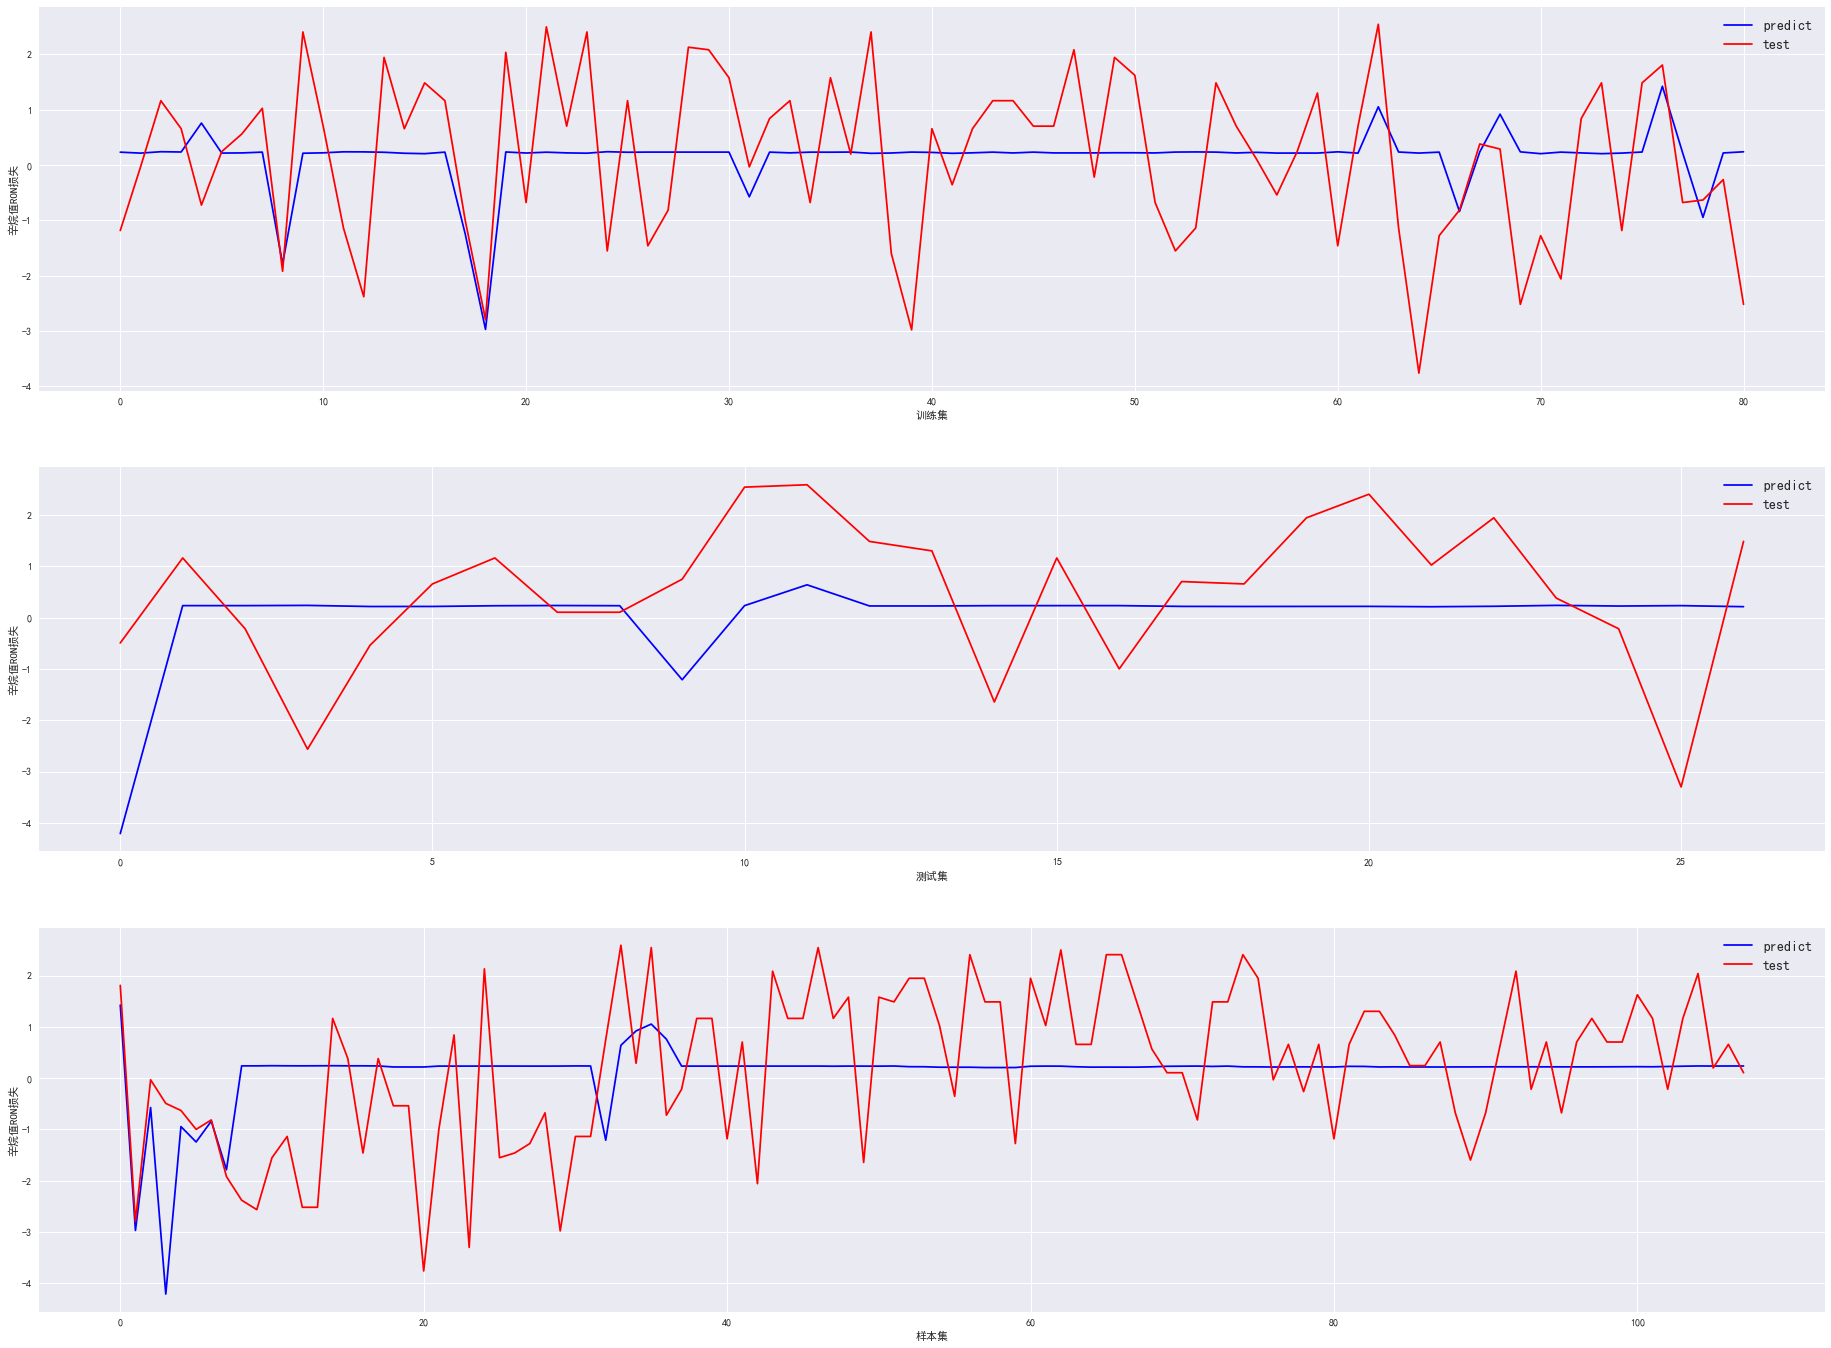

In [10]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 进行加权求和预测

In [11]:
data_1st = samples_data[model_features_1st.keys()]
data_2nd = samples_data[model_features_2nd.keys()]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]

In [12]:
X_quadratic_1st = quadratic_featurizer.transform(data_1st)
X_quadratic_2nd = quadratic_featurizer.transform(data_2nd)

y_pred = weight_1st * model_1st.predict(X_quadratic_1st) + weight_2nd * model_2nd.predict(X_quadratic_2nd)
print ('MSE whole:%.3f' % (metrics.mean_squared_error(y, y_pred)))
print ('R^2 whole:%.3f' % (metrics.r2_score(y, y_pred)))

MSE whole:13105.321
R^2 whole:-257626.543


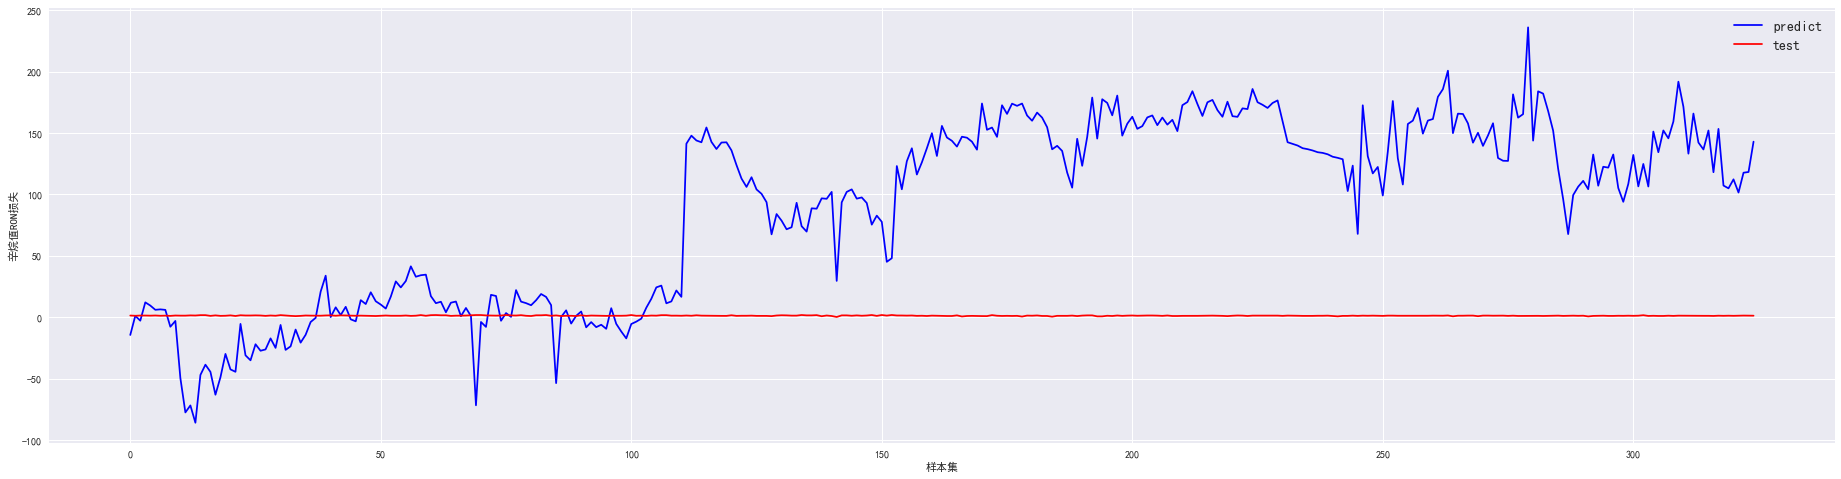

In [13]:
plt.figure(figsize = (32, 8))
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类的模型的特征的并集

In [14]:
X = samples_data[list(set(model_features_1st.keys()).union(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 59)
y_train.shape=(243, 1)
X_test.shape=(82, 59)
y_test.shape=(82, 1)


In [15]:
# 多项式线性回归
# Applying LinearRegression
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)

X_quadratic = quadratic_featurizer.transform(X)
X_test_quadratic = quadratic_featurizer.transform(X_test)

model_3rd = Ridge(alpha=1.0)
model_3rd.fit(X_train_quadratic, y_train)
y_train_pred = model_3rd.predict(X_train_quadratic)
y_test_pred = model_3rd.predict(X_test_quadratic)
y_pred = model_3rd.predict(X_quadratic)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.210, test:0.266, whole:0.224
R^2 train:-2.970, test:-5.426, whole:-3.404


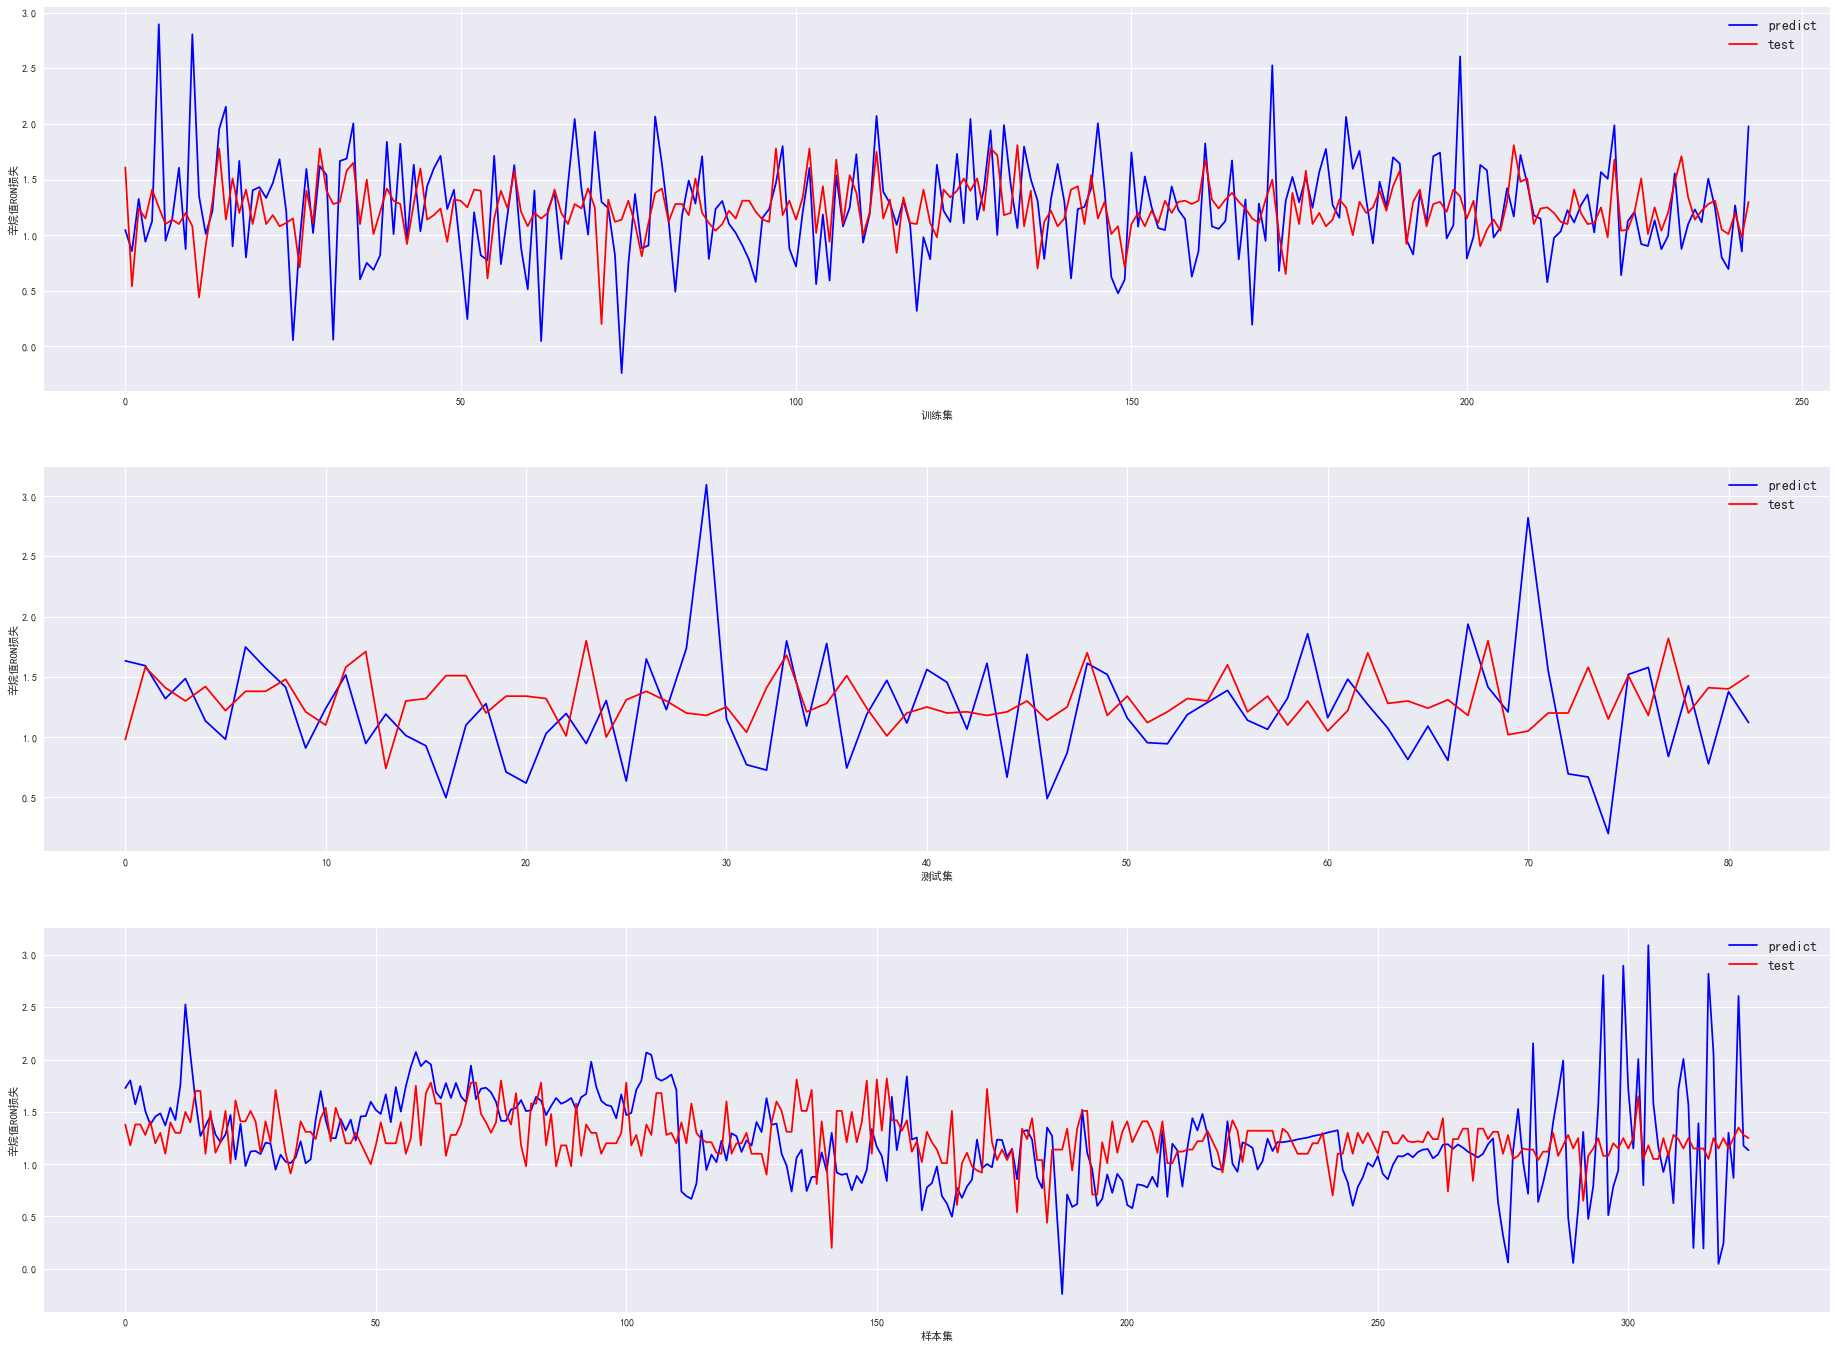

In [16]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类线性模型的特征的交集

In [17]:
X = samples_data[list(set(model_features_1st.keys()).intersection(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 5)
y_train.shape=(243, 1)
X_test.shape=(82, 5)
y_test.shape=(82, 1)


In [18]:
# 多项式线性回归
# Applying LinearRegression
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)

X_quadratic = quadratic_featurizer.transform(X)
X_test_quadratic = quadratic_featurizer.transform(X_test)

model_4th = Ridge(alpha=1.0)
model_4th.fit(X_train_quadratic, y_train)
y_train_pred = model_4th.predict(X_train_quadratic)
y_test_pred = model_4th.predict(X_test_quadratic)
y_pred = model_4th.predict(X_quadratic)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.044, test:0.072, whole:0.051
R^2 train:0.087, test:-0.299, whole:-0.009


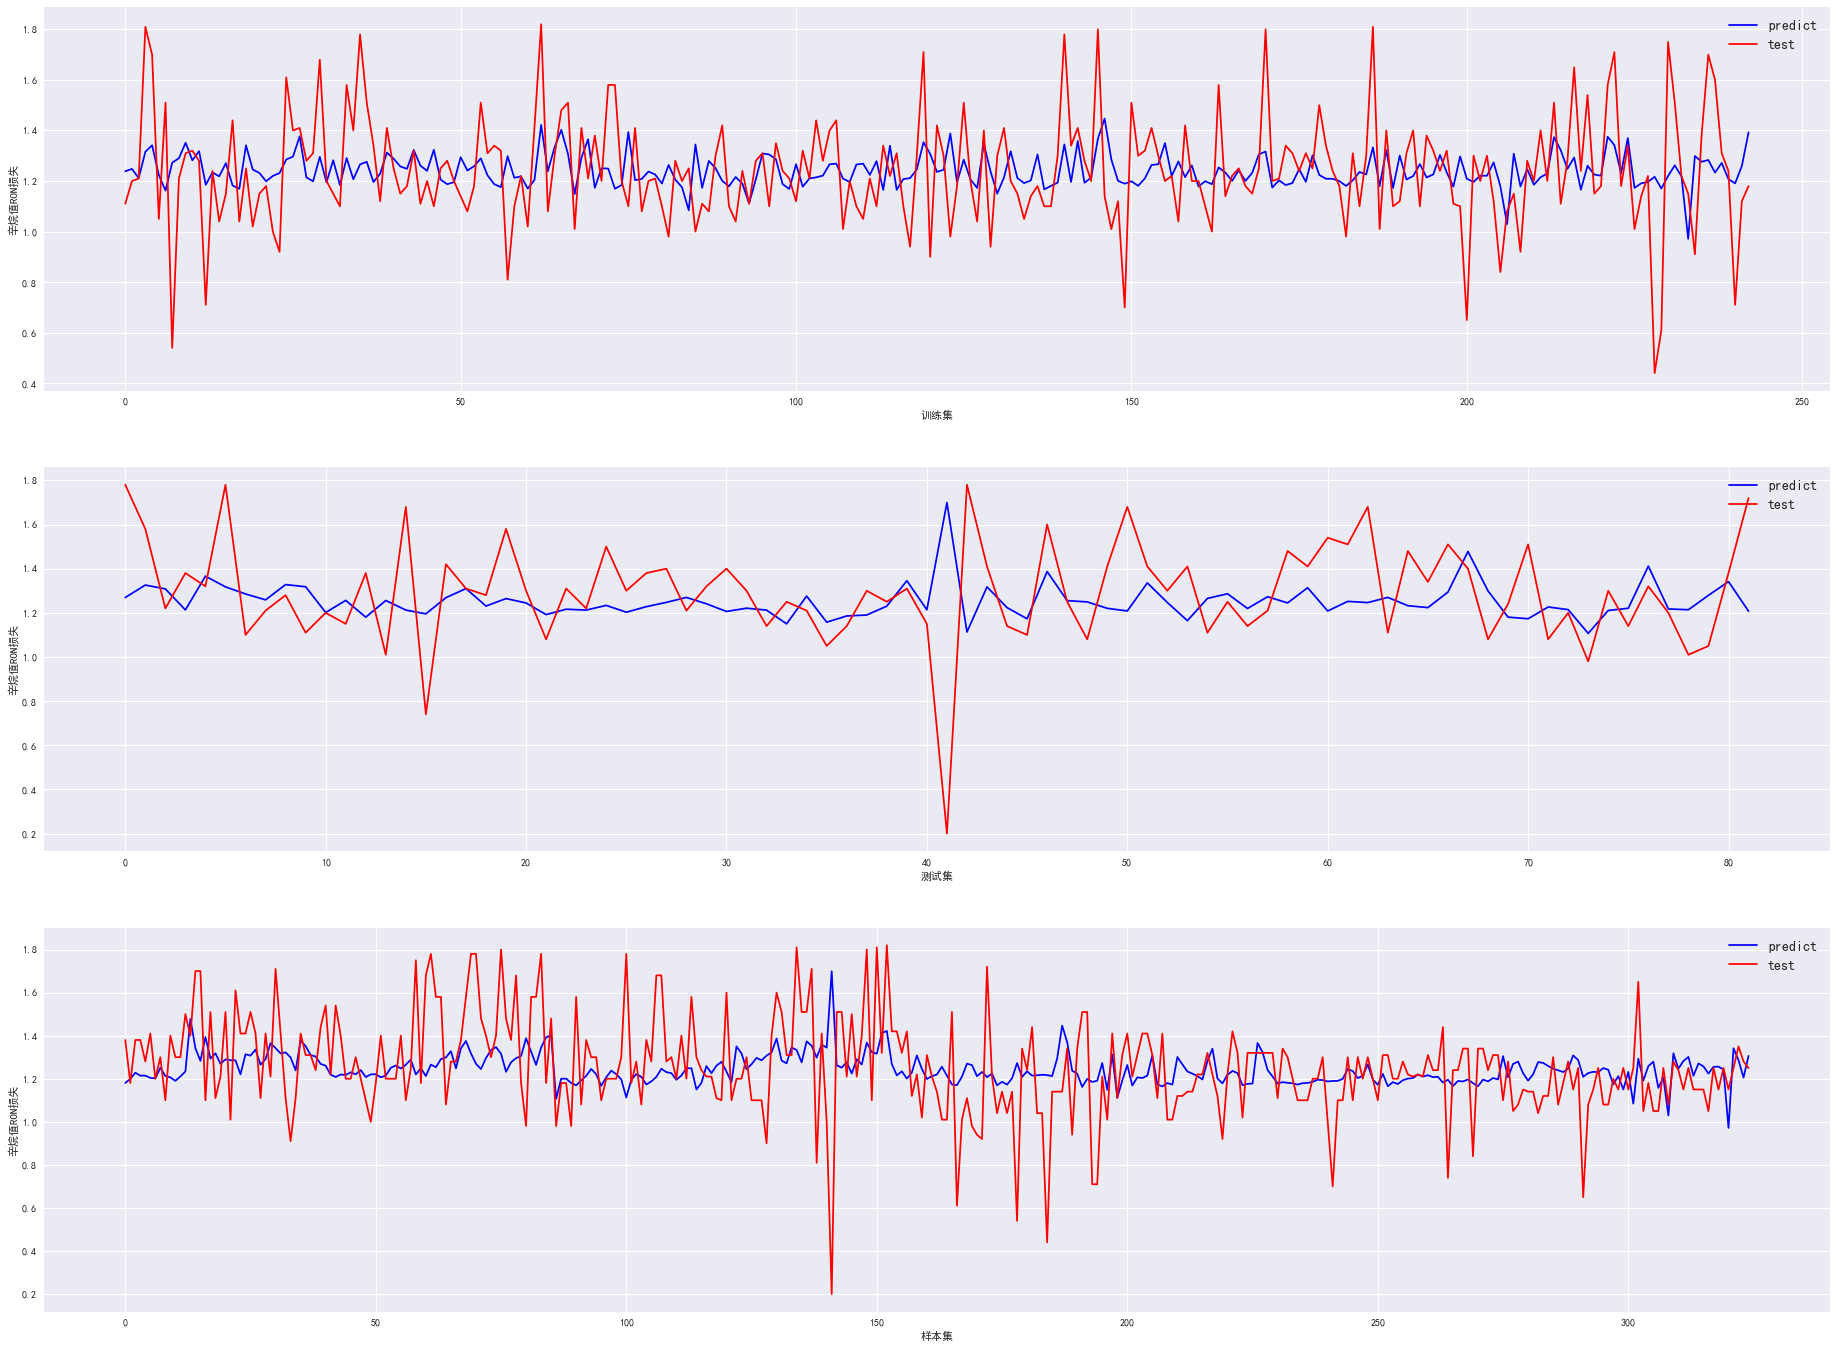

In [19]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()